In [1]:
import os
import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets.samples_generator import make_blobs

from helpers.labels import Labels

In [2]:
centers = [(-2, -2), (0, 0), (4.2, 5)]
X, y = make_blobs(n_samples=20000, centers=centers, n_features=2, random_state=0)

In [3]:
radius = 0.1
min_samples = 10

round_decimals = 1

## DBSCAN without subsampling

In [4]:
from sklearn.preprocessing import FunctionTransformer

In [5]:
pipeline_noClip = make_pipeline(StandardScaler(), 
                                FunctionTransformer(np.round, 
                                                    validate=False, 
                                                    kw_args={"decimals": round_decimals}),
                                DBSCAN(eps=radius, min_samples=min_samples))
labels_noClip = pipeline_noClip.fit_predict(X)
labels_noClip = Labels('noClip', labels_noClip)

## DBSCAN with subsampling

In [6]:
from gridrep import cluster

In [7]:
pipeline_clip = make_pipeline(StandardScaler(), 
                              cluster.ClippedDBSCAN(eps=radius,
                                                    min_samples=min_samples,
                                                    round_decimals=round_decimals))
labels_clip = pipeline_clip.fit_predict(X)
labels_clip = Labels('clip', labels_clip)

### Compare labels

In [8]:
from helpers.labels import where_not_all_match

In [9]:
noClip_clip = where_not_all_match(labels_noClip, labels_clip)
clip_noClip = where_not_all_match(labels_clip, labels_noClip)

In [10]:
from helpers.labels import scatter_from_mismatch

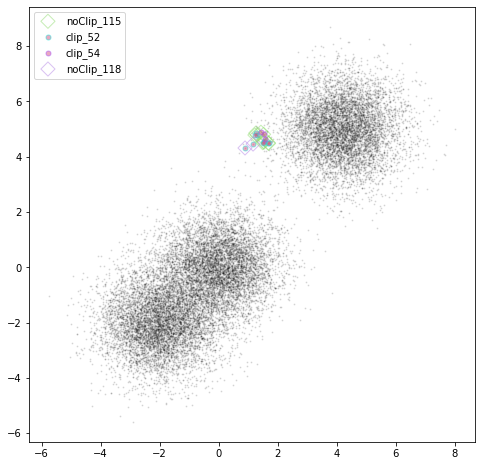

In [11]:
plt.figure(figsize=(8,8))
plt.scatter(X[:,0], X[:,1], s=1, c='k', alpha=0.1)

plotted1 = scatter_from_mismatch(labels_noClip, labels_clip, noClip_clip, X)
plotted2 = scatter_from_mismatch(labels_clip,labels_noClip, clip_noClip, X, excluded=plotted1)

plt.legend()
plt.savefig('border_mismatch.png', dpi=300, bbox_inches='tight')

plt.show()

### Time

In [12]:
%%timeit
pipeline_noClip.fit_predict(X)

306 ms ± 4.01 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [13]:
%%timeit
pipeline_clip.fit_predict(X)

44.7 ms ± 533 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
